In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import scipy
import math
import pandas_ta as ta
from tools.data_processing import dataprep2

%matplotlib widget

/home/raulserrano/Code/TRAD-GEAR/ASRD/.venv/lib/python3.12/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
df = dataprep2('XAUUSD', 'H1')
df

,open,high,low,close,volume
datetime,,,,,
2004-06-11 08:00:00,383.80,384.30,383.10,383.10,41
2004-06-11 09:00:00,383.10,384.10,382.80,383.10,55
2004-06-11 10:00:00,383.00,383.80,383.00,383.60,33
2004-06-11 11:00:00,383.60,383.80,383.50,383.60,23
2004-06-11 12:00:00,383.50,384.10,383.30,383.30,20
...,...,...,...,...,...
2025-02-21 20:00:00,2939.81,2942.72,2937.69,2941.89,4331
2025-02-21 21:00:00,2941.98,2942.56,2932.91,2933.46,3946
2025-02-21 22:00:00,2933.22,2937.22,2932.49,2934.80,4340


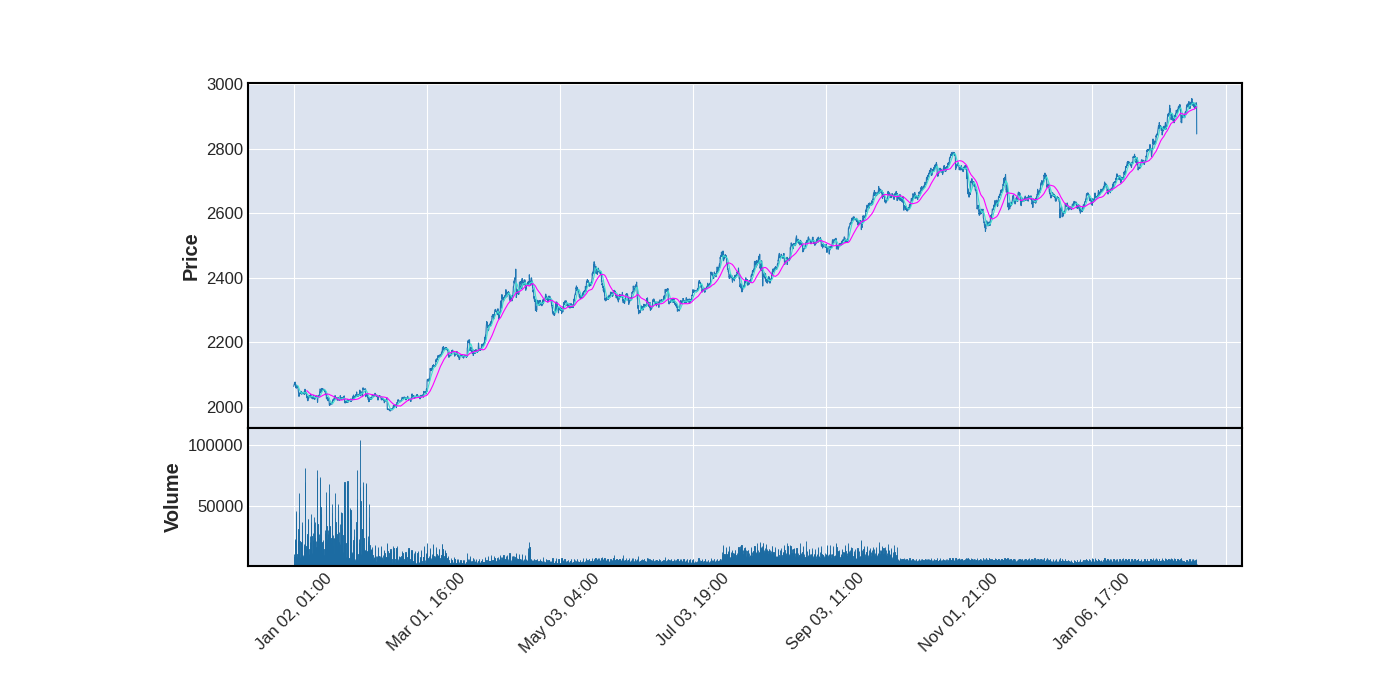

In [3]:
df1 = df[df.index.year >= 2024]

mpf.plot(
    df1,
    type="line",
    volume=True,
    mav=(25,100),
    figratio=(16,8),   # Relación ancho:alto
    figscale=1.2       # Escala general (1=normal, >1 más grande)
)


In [4]:
arange = np.arange(0, 100, 16)
linspace = np.linspace(1, 10, 20, endpoint=True)

linspace

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

### Recreacion paso a paso del algoritmo para comprenderlo

---
## **FIND LEVELS**

In [5]:
price = np.array(df['close'])
price = price[-100:]
price

array([2896.74, 2902.95, 2899.23, 2899.17, 2898.46, 2898.38, 2899.45,
       2899.38, 2899.37, 2895.67, 2903.03, 2908.88, 2910.65, 2910.65,
       2913.67, 2911.54, 2912.38, 2912.64, 2911.24, 2914.19, 2918.14,
       2918.87, 2927.95, 2927.13, 2932.79, 2931.16, 2933.31, 2935.92,
       2933.53, 2935.08, 2934.06, 2929.15, 2938.28, 2929.08, 2928.88,
       2929.19, 2932.76, 2931.66, 2934.25, 2938.63, 2945.55, 2944.76,
       2934.95, 2933.62, 2936.31, 2938.13, 2925.41, 2928.36, 2923.77,
       2924.7 , 2931.85, 2935.95, 2932.99, 2935.26, 2940.84, 2937.13,
       2940.78, 2941.91, 2939.91, 2946.81, 2947.75, 2948.95, 2954.62,
       2951.61, 2952.36, 2948.76, 2945.41, 2934.01, 2935.15, 2938.54,
       2943.1 , 2940.57, 2941.73, 2937.9 , 2937.79, 2939.06, 2941.32,
       2939.99, 2928.69, 2939.02, 2931.19, 2928.38, 2930.21, 2929.77,
       2930.09, 2923.29, 2929.25, 2930.5 , 2928.37, 2930.11, 2930.94,
       2933.68, 2928.8 , 2936.78, 2939.78, 2941.89, 2933.46, 2934.8 ,
       2936.31, 2845

In [6]:
log_price = np.log(price)
log_price

array([7.97134125, 7.97348274, 7.97220046, 7.97217977, 7.97193484,
       7.97190724, 7.97227634, 7.9722522 , 7.97224875, 7.9709718 ,
       7.9735103 , 7.97552341, 7.9761317 , 7.9761317 , 7.97716873,
       7.97643743, 7.9767259 , 7.97681517, 7.97633439, 7.97734719,
       7.97870171, 7.97895183, 7.9820578 , 7.9817777 , 7.98370947,
       7.98315353, 7.98388676, 7.98477614, 7.98396176, 7.98448999,
       7.98414241, 7.98246756, 7.98557966, 7.98244366, 7.98237538,
       7.98248121, 7.98369924, 7.98332409, 7.98420716, 7.98569877,
       7.98805084, 7.9877826 , 7.9844457 , 7.98399243, 7.98490897,
       7.9855286 , 7.98118992, 7.98219782, 7.98062916, 7.98094719,
       7.9833889 , 7.98478636, 7.98377766, 7.98455131, 7.98645053,
       7.98518819, 7.98643013, 7.98681431, 7.98613425, 7.98847851,
       7.98879745, 7.98920445, 7.99112533, 7.99010606, 7.99036013,
       7.98914002, 7.98800331, 7.98412537, 7.98451384, 7.98566814,
       7.98721873, 7.98635872, 7.98675312, 7.98545032, 7.98541

In [7]:
df['atr14'] = df.ta.atr()
df

,open,high,low,close,volume,atr14
datetime,,,,,,
2004-06-11 08:00:00,383.80,384.30,383.10,383.10,41,NaN
2004-06-11 09:00:00,383.10,384.10,382.80,383.10,55,NaN
2004-06-11 10:00:00,383.00,383.80,383.00,383.60,33,NaN
2004-06-11 11:00:00,383.60,383.80,383.50,383.60,23,NaN
2004-06-11 12:00:00,383.50,384.10,383.30,383.30,20,NaN
...,...,...,...,...,...,...
2025-02-21 20:00:00,2939.81,2942.72,2937.69,2941.89,4331,8.253219
2025-02-21 21:00:00,2941.98,2942.56,2932.91,2933.46,3946,8.352989
2025-02-21 22:00:00,2933.22,2937.22,2932.49,2934.80,4340,8.094204


### **Set Up Weights**

In [8]:
last_w = 1.0
first_w = 0.1
atr_mult = 5.0
prom_thresh = 0.1

w_step = (last_w - first_w) / (len(price))

weights = first_w + np.arange(len(price)) * w_step
weights

array([0.1  , 0.109, 0.118, 0.127, 0.136, 0.145, 0.154, 0.163, 0.172,
       0.181, 0.19 , 0.199, 0.208, 0.217, 0.226, 0.235, 0.244, 0.253,
       0.262, 0.271, 0.28 , 0.289, 0.298, 0.307, 0.316, 0.325, 0.334,
       0.343, 0.352, 0.361, 0.37 , 0.379, 0.388, 0.397, 0.406, 0.415,
       0.424, 0.433, 0.442, 0.451, 0.46 , 0.469, 0.478, 0.487, 0.496,
       0.505, 0.514, 0.523, 0.532, 0.541, 0.55 , 0.559, 0.568, 0.577,
       0.586, 0.595, 0.604, 0.613, 0.622, 0.631, 0.64 , 0.649, 0.658,
       0.667, 0.676, 0.685, 0.694, 0.703, 0.712, 0.721, 0.73 , 0.739,
       0.748, 0.757, 0.766, 0.775, 0.784, 0.793, 0.802, 0.811, 0.82 ,
       0.829, 0.838, 0.847, 0.856, 0.865, 0.874, 0.883, 0.892, 0.901,
       0.91 , 0.919, 0.928, 0.937, 0.946, 0.955, 0.964, 0.973, 0.982,
       0.991])

### **Kernel Density Estimation**

La estimación de densidad en un punto $x$ se define como:

$$
\hat{f}(x) = \frac{1}{n \, h} \sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)
$$

Donde:

* $n$ = número de datos
* $h$ = parámetro de suavizado (**bandwidth**)
* $K(\cdot)$ = función kernel (usualmente gaussiana)
* $x_i$ = cada punto de la muestra

In [9]:
# Tengo que definir atr pero no me encaja el como lo pide la fx, es decir, se pide un valor float 
# de atr en lugar de otro array, entonces no entiendo que atr es, dudo que sea de los 168 periodos

''' Ya lo he pillado, toma el atr del ultimo valor, es decir el que se le introduce'''

atr = ta.atr(np.log(df['high']), np.log(df['low']), np.log(df['close']), 100)

kernal = scipy.stats.gaussian_kde(log_price, bw_method= atr.iloc[-1]*atr_mult, weights=weights)
kernal

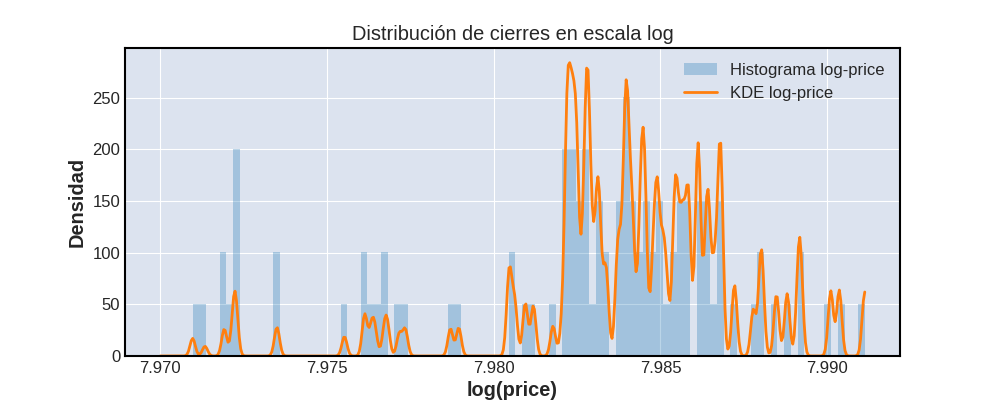

In [10]:
# Malla de puntos donde dibujar la densidad
grid_log = np.linspace(7.970, log_price.max(), 500)
pdf_log  = kernal(grid_log)              # f̂ en escala log

plt.figure(figsize=(10, 4))

# Histograma (probability=True normaliza el área a 1)
plt.hist(log_price[log_price > 7.965], bins=100, density=True, alpha=0.3, label='Histograma log-price')

# Densidad KDE
plt.plot(grid_log, pdf_log, lw=2, label='KDE log-price')

plt.title('Distribución de cierres en escala log')
plt.xlabel('log(price)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


### Construct **Market Profile**

In [11]:
min_v = min(log_price)
max_v = max(log_price)

step = (max_v - min_v)/200
price_range = np.arange(min_v, max_v, step)
pdf = kernal(price_range)
pdf

array([9.33253667e+001, 4.85802605e+000, 6.85236114e-004, 2.61903268e-010,
       2.71245074e-019, 7.61207523e-031, 5.78848022e-045, 1.19274143e-061,
       6.65960275e-081, 1.00755929e-102, 4.13060030e-127, 4.58855562e-154,
       1.38120804e-183, 1.12658111e-215, 2.48992406e-250, 1.49117978e-287,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [12]:
# Find significant peaks in the market profile
pdf_max = np.max(pdf)
prom_min = pdf_max * prom_thresh

peaks, props = scipy.signal.find_peaks(pdf, prominence=prom_min)
levels = [] 
for peak in peaks:
    levels.append(np.exp(price_range[peak]))

levels

[2899.358204948194,
 2911.4264362171502,
 2912.5260358862165,
 2923.5449000533395,
 2924.649076674328,
 2928.516979993033,
 2930.1762183806914,
 2933.497515961204,
 2935.159576219633,
 2936.268139519918,
 2937.931769557521,
 2940.7065811707375,
 2941.8172394869675,
 2942.928317281259,
 2945.7078480233513,
 2946.820395238888,
 2949.0467504030667,
 2952.389437363493]

## Import own gaussian KDE

In [13]:
from gaussian_kde import gaussian_kde

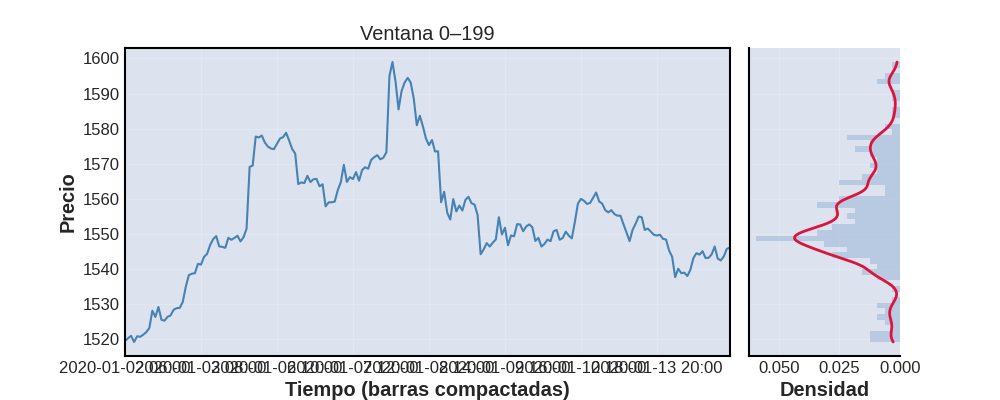

In [14]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
import pandas as pd

# ----------------- Parámetros -----------------
win        = 200
step       = 1
bins_prof  = 50
interval   = 120
pad_frac_y = 0.05
pad_frac_x = 0.05

# ----------------- Datos ----------------------
df = df[df.index > '2020']
prices = df['close'].to_numpy(dtype=float)
times  = df.index.to_numpy()                  # datetimes reales (para etiquetar)
pos    = np.arange(len(times), dtype=float)   # eje X compactado: 0..N-1
frames_tot = len(prices) - win + 1

# ----------------- Formateador eje X (mapea índice->fecha) ----------------
def fmt_x(x, _):
    i = int(round(x))
    if 0 <= i < len(times):
        return pd.to_datetime(times[i]).strftime('%Y-%m-%d %H:%M')
    return ""

# ----------------- Figura/Axes ----------------
fig, (ax_main, ax_prof) = plt.subplots(
    ncols=2, figsize=(10, 4),
    gridspec_kw={'width_ratios': [4, 1], 'wspace': 0.05},
    sharey=True
)

# Primera ventana
x0 = pos[:win]   # <<< usamos posiciones compactas
y0 = prices[:win]

# Línea de precios (izquierda)
line, = ax_main.plot(x0, y0, lw=1.5, color='steelblue')
ax_main.set_xlabel("Tiempo (barras compactadas)")
ax_main.set_ylabel("Precio")
ax_main.grid(alpha=0.2)
ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
ax_main.xaxis.set_major_locator(MaxNLocator(nbins=8))  # ~8 ticks legibles

# Profile inicial (derecha, mirando a la izquierda)
counts, bin_edges, _ = ax_prof.hist(
    y0, bins=bins_prof, orientation='horizontal', density=True,
    color='lightsteelblue', edgecolor='none', alpha=0.8
)

# Tu función externa de KDE (la asumo definida en tu entorno)

x_kde, y_kde = gaussian_kde(y0, x_grid_len=400, use_weights=True, fw=0.3, bw_factor=0.4)
ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
ax_prof.invert_xaxis()

# Límites iniciales
def set_limits_for_window(y, counts, y_kde, x_start, x_end):
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    # Limites X en unidades compactas (índices)
    ax_main.set_xlim(x_start, x_end)

set_limits_for_window(y0, counts, y_kde, x0[0], x0[-1])

# Estética profile
ax_prof.set_xlabel("Densidad")
ax_prof.grid(alpha=0.2)
ax_prof.spines['right'].set_visible(False)
ax_prof.spines['top'].set_visible(False)

ax_main.set_title(f"Ventana 0–{win-1}")

# ----------------- Update por frame ----------------
def update(i):
    start = i * step
    end   = start + win

    x = pos[start:end]      # <<< posiciones compactas
    y = prices[start:end]

    # Actualizar línea y eje X del principal
    line.set_data(x, y)
    ax_main.set_xlim(x[0], x[-1])

    # Redibujar profile
    ax_prof.cla()
    counts, bin_edges, _ = ax_prof.hist(
        y, bins=bins_prof, orientation='horizontal', density=True,
        color='lightsteelblue', edgecolor='none', alpha=0.8
    )
    x_kde, y_kde = gaussian_kde(y, x_grid_len=200, use_weights=False, fw=0.2, bw_factor=0.3)
    ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
    ax_prof.invert_xaxis()
    ax_prof.set_xlabel("Densidad")
    ax_prof.grid(alpha=0.2)
    ax_prof.spines['right'].set_visible(False)
    ax_prof.spines['top'].set_visible(False)

    # Ajustar límites sincronizados
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    # Título con las fechas reales (usamos times[start] y times[end-1])
    ax_main.set_title(
        f"Ventana {start}–{end-1} "
        f"({pd.to_datetime(times[start]).strftime('%Y-%m-%d %H:%M')} → "
        f"{pd.to_datetime(times[end-1]).strftime('%Y-%m-%d %H:%M')})"
    )

    # mantener formateador/locator (por si algún backend los resetea)
    ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
    ax_main.xaxis.set_major_locator(MaxNLocator(nbins=8))

    return line,

# ----------------- Animación -----------------------
# ani = FuncAnimation(fig, update,
#                     frames=frames_tot // step,
#                     interval=interval,
#                     blit=False,
#                     repeat=False)


# plt.show()

/tmp/ipykernel_18882/820908983.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


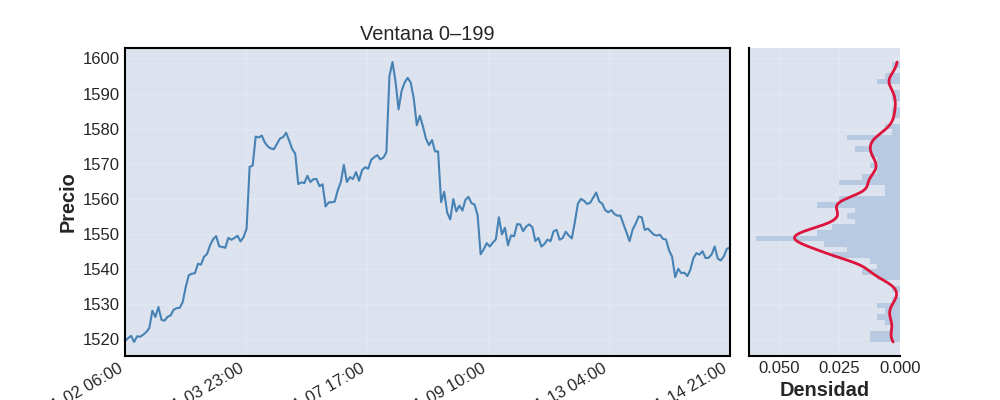

In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

# ----------------- Parámetros -----------------
win        = 200
step       = 1
bins_prof  = 50
interval   = 120
pad_frac_y = 0.05
pad_frac_x = 0.05
NTICKS_X   = 6   # <-- nº máximo de etiquetas visibles en X

# ----------------- Datos ----------------------
df = df[df.index > '2020']
prices = df['close'].to_numpy(dtype=float)
times  = df.index.to_numpy()                  # datetimes reales (para etiquetar)
pos    = np.arange(len(times), dtype=float)   # eje X compactado: 0..N-1
frames_tot = len(prices) - win + 1

# ----------------- Formateador eje X (mapea índice->fecha) ----------------
def fmt_x(x, _):
    i = int(round(x))
    if 0 <= i < len(times):
        return pd.to_datetime(times[i]).strftime('%Y-%m-%d %H:%M')
    return ""

def set_xticks_window(ax, x_start, x_end, nticks=NTICKS_X):
    # Ticks equiespaciados en el rango visible (índices compactados)
    locs = np.linspace(x_start, x_end, nticks)
    ax.set_xticks(locs)

# ----------------- Figura/Axes ----------------
fig, (ax_main, ax_prof) = plt.subplots(
    ncols=2, figsize=(10, 4),
    gridspec_kw={'width_ratios': [4, 1], 'wspace': 0.05},
    sharey=True
)

# Primera ventana
x0 = pos[:win]
y0 = prices[:win]

# Línea de precios (izquierda)
line, = ax_main.plot(x0, y0, lw=1.5, color='steelblue')
ax_main.set_xlabel("Tiempo (barras compactadas)")
ax_main.set_ylabel("Precio")
ax_main.grid(alpha=0.2)
ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
set_xticks_window(ax_main, x0[0], x0[-1], NTICKS_X)
plt.setp(ax_main.get_xticklabels(), rotation=30, ha="right")  # mejor legibilidad

# Profile inicial (derecha, mirando a la izquierda)
counts, bin_edges, _ = ax_prof.hist(
    y0, bins=bins_prof, orientation='horizontal', density=True,
    color='lightsteelblue', edgecolor='none', alpha=0.8
)

# Tu función externa de KDE (asumida definida)
x_kde, y_kde = gaussian_kde(y0, x_grid_len=400, use_weights=True, fw=0.3, bw_factor=0.4)
ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
ax_prof.invert_xaxis()

# Límites iniciales
def set_limits_for_window(y, counts, y_kde, x_start, x_end):
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    ax_main.set_xlim(x_start, x_end)
    set_xticks_window(ax_main, x_start, x_end, NTICKS_X)

set_limits_for_window(y0, counts, y_kde, x0[0], x0[-1])

# Estética profile
ax_prof.set_xlabel("Densidad")
ax_prof.grid(alpha=0.2)
ax_prof.spines['right'].set_visible(False)
ax_prof.spines['top'].set_visible(False)

ax_main.set_title(f"Ventana 0–{win-1}")

# ----------------- Update por frame ----------------
def update(i):
    start = i * step
    end   = start + win

    x = pos[start:end]
    y = prices[start:end]

    # Actualizar línea y eje X del principal
    line.set_data(x, y)
    ax_main.set_xlim(x[0], x[-1])
    set_xticks_window(ax_main, x[0], x[-1], NTICKS_X)

    # Redibujar profile
    ax_prof.cla()
    counts, bin_edges, _ = ax_prof.hist(
        y, bins=bins_prof, orientation='horizontal', density=True,
        color='lightsteelblue', edgecolor='none', alpha=0.8
    )
    x_kde, y_kde = gaussian_kde(y, x_grid_len=200, use_weights=False, fw=0.2, bw_factor=0.3)
    ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
    ax_prof.invert_xaxis()
    ax_prof.set_xlabel("Densidad")
    ax_prof.grid(alpha=0.2)
    ax_prof.spines['right'].set_visible(False)
    ax_prof.spines['top'].set_visible(False)

    # Ajustar límites sincronizados
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    ax_main.set_title(
        f"Ventana {start}–{end-1} "
        f"({pd.to_datetime(times[start]).strftime('%Y-%m-%d %H:%M')} → "
        f"{pd.to_datetime(times[end-1]).strftime('%Y-%m-%d %H:%M')})"
    )

    # (por si el backend resetea el formatter en algún frame)
    ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
    plt.setp(ax_main.get_xticklabels(), rotation=30, ha="right")

    return line,

# ----------------- Animación -----------------------
ani = FuncAnimation(fig, update,
                    frames=frames_tot // step,
                    interval=interval,
                    blit=False,
                    repeat=False)

plt.tight_layout()
plt.show()
